In [1]:
!pip install numpy==1.24.0
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.0 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.0 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.0 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.0 whic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.3 MB/s eta 0:00:00


KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot

In [2]:
!pip install arch
from arch.unitroot import ADF,KPSS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 13.3 MB/s eta 0:00:00


In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import  Holt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.tsa.holtwinters import  Holt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [4]:
veri = pd.read_excel("/content/EVDS (9) (1).xlsx")
print(veri)

       Tarih    ACC
0    2011-03   5276
1    2011-04   4777
2    2011-05   4431
3    2011-06   4857
4    2011-07   4024
..       ...    ...
150  2023-09  11272
151  2023-10  11444
152  2023-11  10663
153  2023-12  12781
154  2024-01  11045

[155 rows x 2 columns]


In [7]:
tarih = pd.date_range("01.03.2011",periods=len(veri["Tarih"]),freq="M")
veri["Tarih"] = tarih
veri.set_index("Tarih",inplace=True)
print(veri)

              ACC
Tarih            
2011-01-31   5276
2011-02-28   4777
2011-03-31   4431
2011-04-30   4857
2011-05-31   4024
...           ...
2023-07-31  11272
2023-08-31  11444
2023-09-30  10663
2023-10-31  12781
2023-11-30  11045

[155 rows x 1 columns]


In [8]:
print(veri.isnull().sum())

ACC    0
dtype: int64


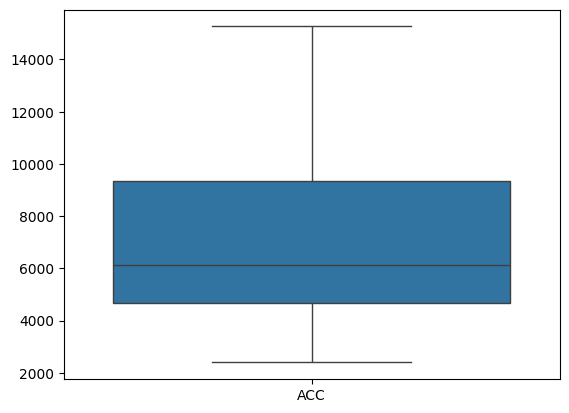

In [10]:
sns.boxplot(veri)
plt.show()

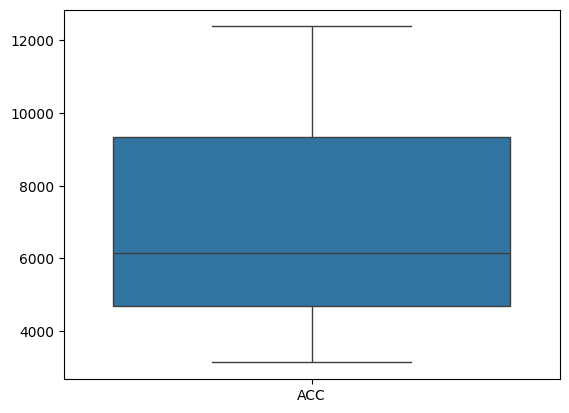

In [13]:
from scipy.stats.mstats import winsorize

veri["ACC"] = winsorize(veri["ACC"],(0.05,0.05))
sns.boxplot(veri)
plt.show()

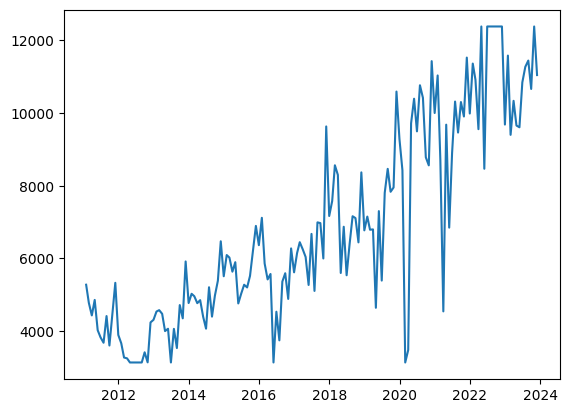

In [17]:
plt.plot(veri)
plt.show()

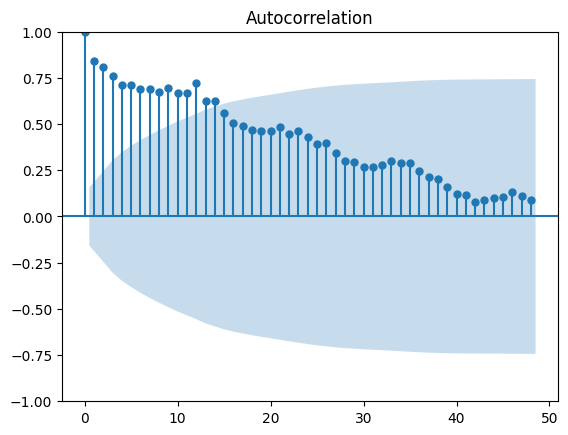

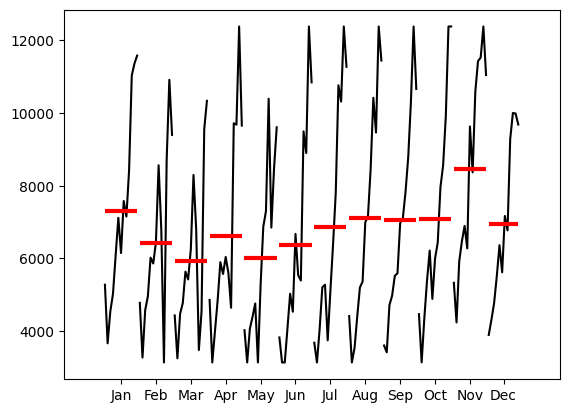

In [19]:
plot_acf(veri,lags=48)
month_plot(veri)
plt.show()

In [39]:
verion = veri.iloc[:-12]
verison = veri.iloc[-12:]

adf = ADF(verion)
kpss = KPSS(verion)

print(adf)
print(kpss)

   Augmented Dickey-Fuller Results   
Test Statistic                  1.209
P-value                         0.996
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  1.522
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [40]:
veri_fark = verion.diff().dropna()
adf2 = ADF(veri_fark)
kpss2 = KPSS(veri_fark)

print(adf2)
print(kpss2)

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.966
P-value                         0.000
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.166
P-value                         0.346
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [41]:
model = auto_arima(verion,trace=True,seasonal=False)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2482.866, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2457.870, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2445.331, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2481.028, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2438.256, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2438.252, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2455.405, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2440.070, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2439.049, Time=0.41 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2457.107, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2444.132, Time=0.18 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.126 seconds
                               S

In [42]:
model2 = auto_arima(verion,trace=True,seasonal=False,information_criterion="bic")
print(model2.summary())

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=inf, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=2488.777, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=2466.737, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=2454.198, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=2483.984, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=2450.079, Time=1.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : BIC=2453.031, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : BIC=2453.828, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : BIC=2452.788, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : BIC=2467.228, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : BIC=2452.528, Time=0.12 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.912 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  143
M

In [43]:
for i in range(2,13):
  smodel = auto_arima(verion,trace=False,seasonal=True,m=i)
  print("m={} için {}".format(i,smodel.aic()))

m=2 için 2436.077300602845
m=3 için 2438.2522300000755
m=4 için 2432.3653550770596
m=5 için 2435.210483050464
m=6 için 2410.3775641263337
m=7 için 2438.2522300000755
m=8 için 2438.2522300000755
m=9 için 2438.2522300000755
m=10 için 2438.2522300000755
m=11 için 2438.2522300000755
m=12 için 2407.5823652580557


In [44]:
model3 = auto_arima(verion,trace=False,seasonal=True,m=6)
model4 = auto_arima(verion,trace=False,seasonal=True,m=12)

print(model3.summary())
print(model4.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  143
Model:             SARIMAX(1, 1, 2)x(0, 0, 2, 6)   Log Likelihood               -1198.189
Date:                           Wed, 02 Jul 2025   AIC                           2410.378
Time:                                   08:59:12   BIC                           2431.068
Sample:                               01-31-2011   HQIC                          2418.785
                                    - 11-30-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     18.0135     14.703      1.225      0.221     -10.805      46.832
ar.L1          0.6729      0.164      4.113

In [45]:
q1 = acorr_ljungbox(model.resid())
q4 = acorr_ljungbox(model4.resid())

print(q1)
print(q4)

     lb_stat  lb_pvalue
1   0.017080   0.896021
2   0.153752   0.926005
3   0.205969   0.976620
4   3.983715   0.408214
5   3.983771   0.551755
6   4.052764   0.669536
7   4.067080   0.772020
8   4.129441   0.845260
9   5.049820   0.829944
10  5.298329   0.870379
     lb_stat  lb_pvalue
1   0.005100   0.943068
2   0.025283   0.987438
3   0.025841   0.998904
4   0.078071   0.999258
5   0.347353   0.996657
6   0.351817   0.999204
7   0.454445   0.999597
8   0.525375   0.999839
9   1.943924   0.992324
10  1.947562   0.996726


In [46]:
tahmin = model4.fittedvalues()
print(tahmin)

Tarih
2011-01-31       55.546202
2011-02-28     4315.490559
2011-03-31     4595.083785
2011-04-30     4380.375888
2011-05-31     4263.388061
                  ...     
2022-07-31    11514.988863
2022-08-31    11213.932295
2022-09-30    12404.412448
2022-10-31    11643.888606
2022-11-30    12165.061557
Length: 143, dtype: float64


In [47]:
def hata(y,tahmin):
  print("MSE: {}".format(mean_squared_error(y,tahmin)))
  print("MAE: {}".format(mean_absolute_error(y,tahmin)))
  print("R2: {}".format(r2_score(y,tahmin)))
  print("RMSE: {}".format(np.sqrt(mean_squared_error(y,tahmin))))

hata(verion,tahmin)

MSE: 1379865.4932197034
MAE: 769.3547375305823
R2: 0.7916148194246206
RMSE: 1174.676761164408


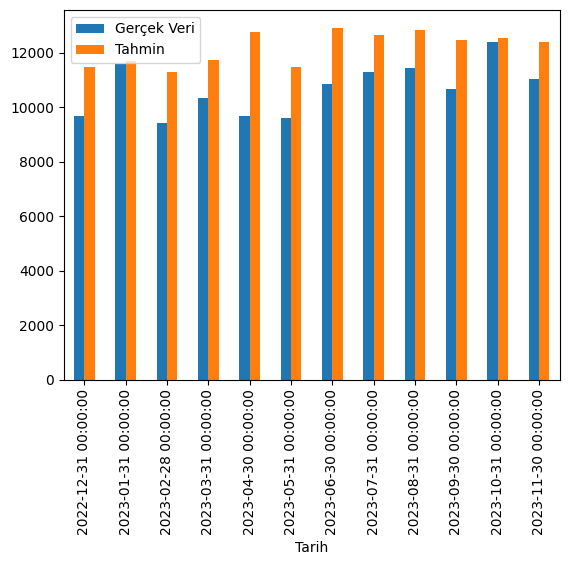

In [48]:
tahmin1 = model4.predict(n_periods=12)
df = pd.DataFrame()
df["Gerçek Veri"] = verison
df["Tahmin"] = tahmin1
df.plot(kind="bar")
plt.show()